# Converting the data format

In [1]:
from PIL import Image
import os
import imageio

filename = r"S1_7ch_16.tif"
mask_path = r"mask_s1.png"
tiff_dir = r"../data/Brain_Data_S1"
jpg_dir = r"../data/Brain_Data_S1/jpgs"

In [2]:
tif_data = imageio.imread(os.path.join(tiff_dir, filename))

/tmp/ipykernel_6760/2545026492.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tif_data = imageio.imread(os.path.join(tiff_dir, filename))


In [3]:
tif_data.shape

(5880, 8611, 7)

In [16]:
# Convert each channel to a separate JPG image
for i in range(tif_data.shape[2]):
    channel_data = tif_data[:, :, i]
    # Normalize the data to 0-255 range
    channel_data = (channel_data / channel_data.max()) * 255
    # Convert to uint8
    channel_data = channel_data.astype('uint8')
    # Create PIL image
    img = Image.fromarray(channel_data)
    # Save as JPEG
    img.save(os.path.join(jpg_dir, f"channel_{i}.jpg"))

# MASK

In [4]:
from PIL import Image
import os
import imageio

filename = r"S1_7ch_16.tif"
mask_path = r"mask_s1.png"
tiff_dir = r"../data/Brain_Data_S1"
jpg_dir = r"../data/Brain_Data_S1/jpgs"

In [5]:
mask_img = imageio.imread(os.path.join(tiff_dir, mask_path))

/tmp/ipykernel_6760/1335886474.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_img = imageio.imread(os.path.join(tiff_dir, mask_path))


In [6]:
print(mask_img.shape)

(5880, 8611)


In [7]:
import pandas as pd
# convert numpy array into pd dataframe
mask_df = pd.DataFrame(mask_img)

In [8]:
mask_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Columns: 8611 entries, 0 to 8610
dtypes: uint8(8611)
memory usage: 48.3 MB


In [9]:
# Basic statistics
mean_pixel_value = mask_df.values.mean()
min_pixel_value = mask_df.values.min()
max_pixel_value = mask_df.values.max()
std_dev_pixel_value = mask_df.values.std()

print("Mean Pixel Value:", mean_pixel_value)
print("Min Pixel Value:", min_pixel_value)
print("Max Pixel Value:", max_pixel_value)
print("Standard Deviation of Pixel Values:", std_dev_pixel_value)

Mean Pixel Value: 0.28881627439037394
Min Pixel Value: 0
Max Pixel Value: 10
Standard Deviation of Pixel Values: 1.3786530110870578


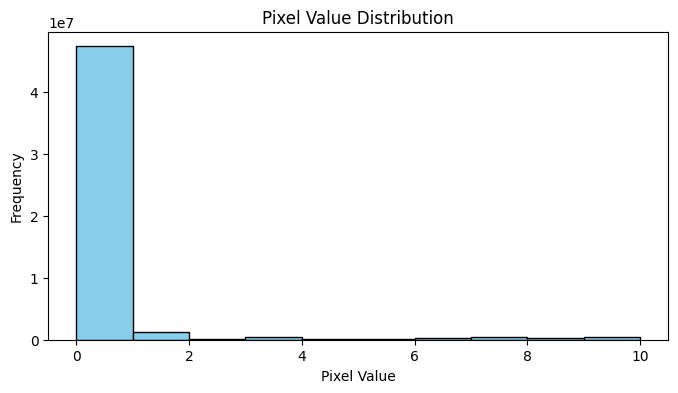

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))  # Set figsize to increase the width
plt.hist(mask_df.values.flatten(), bins=range(11), color='skyblue', edgecolor='black')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

NOTE that the 0 pixel values correspond to the background and dominate the image

Thus, we can ignore the 0 pixel values

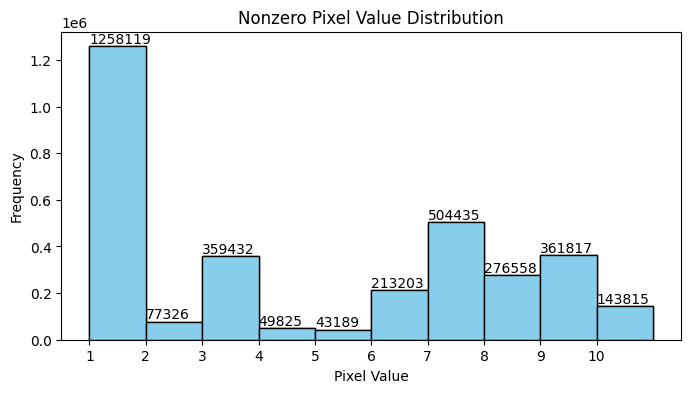

In [30]:
import matplotlib.pyplot as plt

# Flatten the DataFrame values and filter out 0 pixel values
nonzero_pixel_values = mask_df.values.flatten()[mask_df.values.flatten() != 0]

# Create histogram
plt.figure(figsize=(8, 4))  # Set figsize to increase the width
plt.hist(nonzero_pixel_values, bins=range(1, 12), color='skyblue', edgecolor='black')  # Use bins 1-11 to include 10
plt.title('Nonzero Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Set x-axis ticks to show all numbers from 1 to 10
plt.xticks(range(1, 11))

# Annotate each bar with its frequency
for i, freq in enumerate(plt.hist(nonzero_pixel_values, bins=range(1, 12), color='skyblue', edgecolor='black')[0]):
    plt.text(i + 1, freq, str(int(freq)), ha='left', va='bottom')

plt.show()


Now, let us display the ground truth mask (plt automatically scales the pixel intensity values to convert it to 0-255)

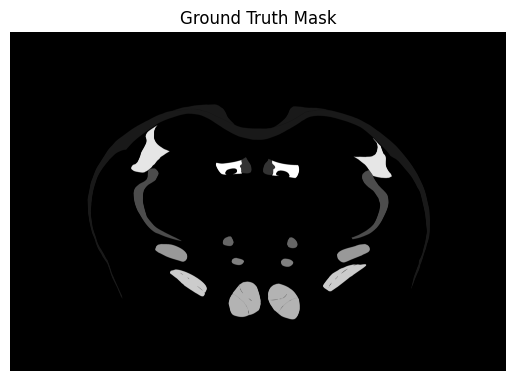

In [22]:
plt.imshow(mask_img, cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')
plt.show()

Another way of verifying this is as follows

In [24]:
im = Image.fromarray(mask_img)
im.show()

In [25]:
new_mask_img = mask_img.copy()
new_mask_img = new_mask_img * 20

In [26]:
new_im = Image.fromarray(new_mask_img)
new_im.show()

# Analysing the data

Run the code cells of the first section before proceeding

In [31]:
tif_data.shape

(5880, 8611, 7)

In [33]:
img1 = tif_data[:, :, 0]
img1.shape

(5880, 8611)

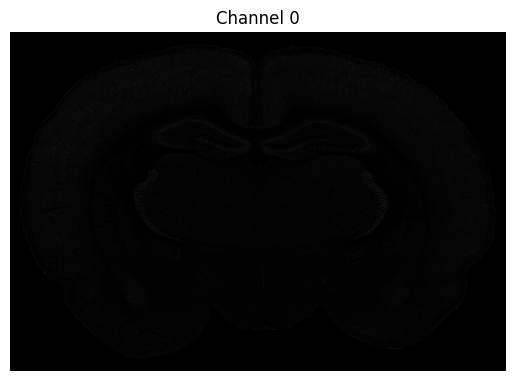

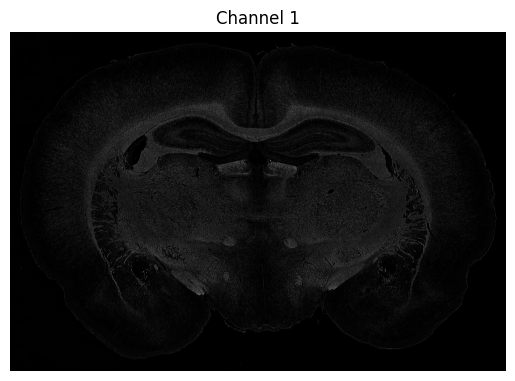

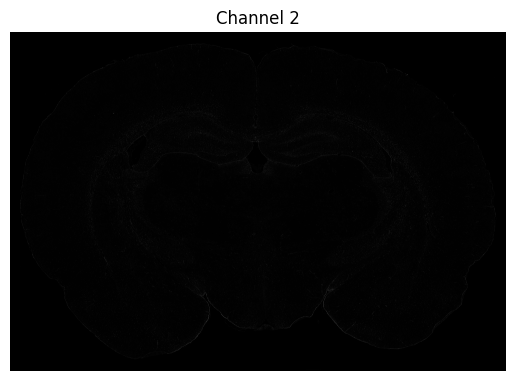

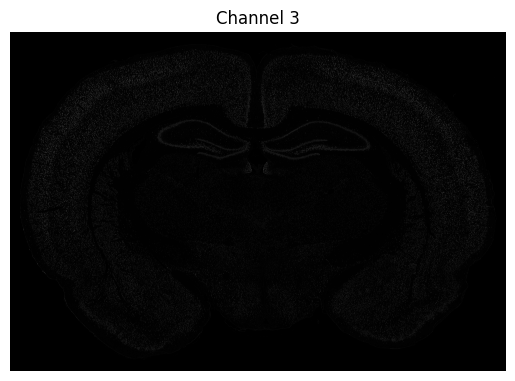

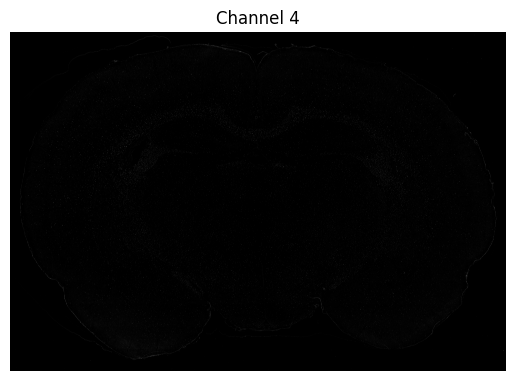

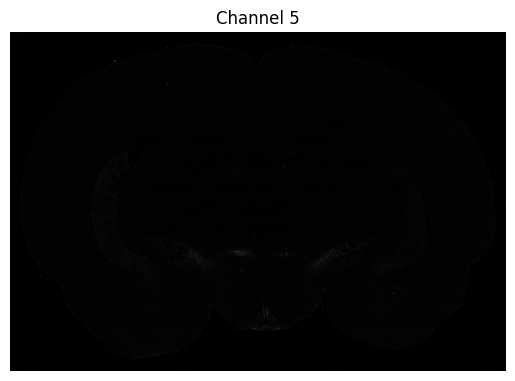

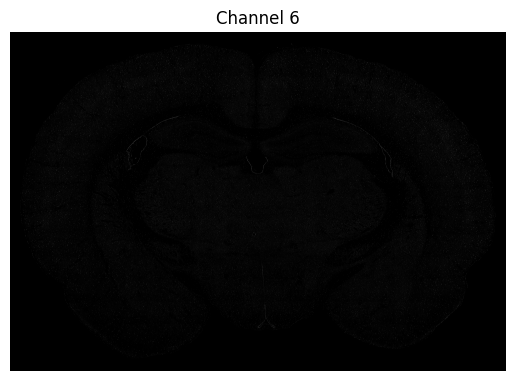

In [34]:
import matplotlib.pyplot as plt

for i in range(tif_data.shape[2]):
    img = tif_data[:, :, i]
    plt.imshow(img, cmap='gray')
    plt.title(f'Channel {i}')
    plt.axis('off')
    plt.show()

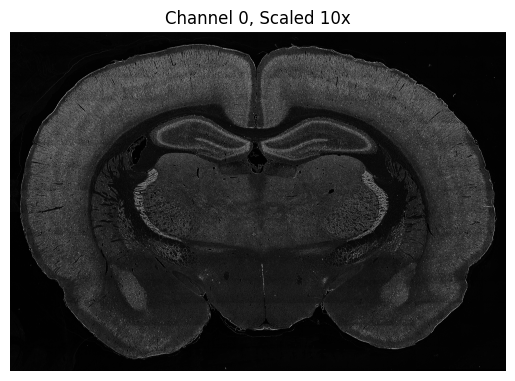

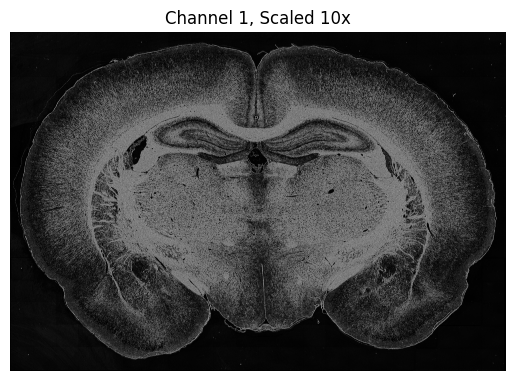

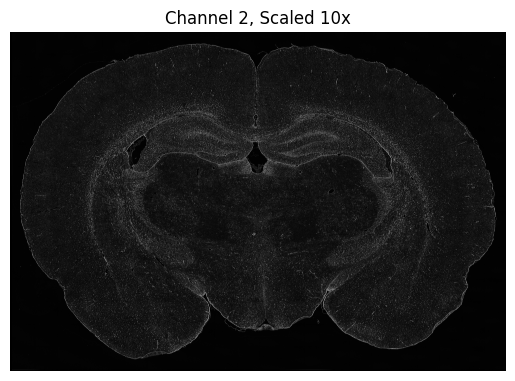

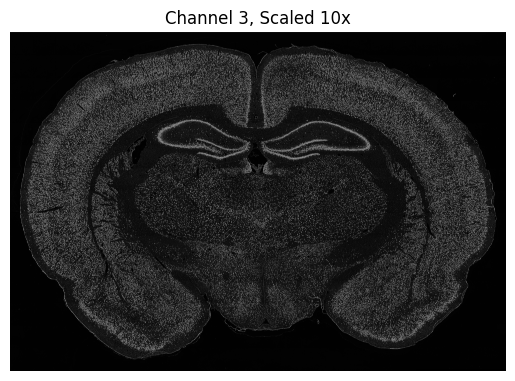

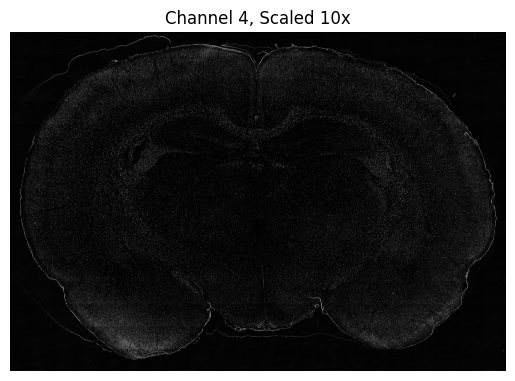

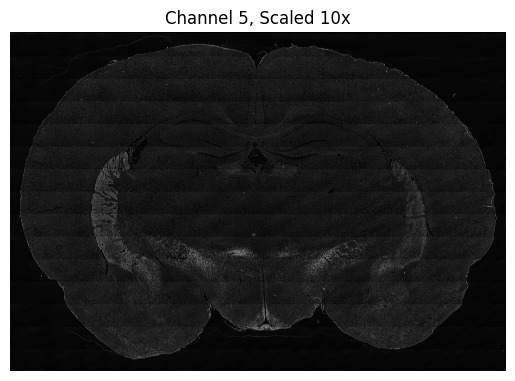

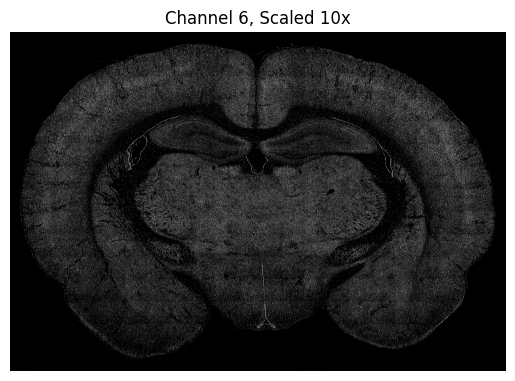

In [35]:
for i in range(tif_data.shape[2]):
    img = tif_data[:, :, i]
    plt.imshow(img*10, cmap='gray')
    plt.title(f'Channel {i}, Scaled 10x')
    plt.axis('off')
    plt.show()

# Exploring the data further: (under progress)

In [37]:
import pandas as pd
# convert numpy array into pd dataframe
img1_df = pd.DataFrame(img1)

In [38]:
img1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Columns: 8611 entries, 0 to 8610
dtypes: uint16(8611)
memory usage: 96.6 MB


In [39]:
# Basic statistics
mean_pixel_value = img1_df.values.mean()
min_pixel_value = img1_df.values.min()
max_pixel_value = img1_df.values.max()
std_dev_pixel_value = img1_df.values.std()

print("Mean Pixel Value:", mean_pixel_value)
print("Min Pixel Value:", min_pixel_value)
print("Max Pixel Value:", max_pixel_value)
print("Standard Deviation of Pixel Values:", std_dev_pixel_value)

Mean Pixel Value: 864.1114281132265
Min Pixel Value: 0
Max Pixel Value: 64529
Standard Deviation of Pixel Values: 1079.7800204505522


In [49]:
# normalize the img1 data
img1_normalised = (img1 / img1.max()) * 10
normalised_img1_df = pd.DataFrame(img1_normalised)

# Basic statistics
mean_pixel_value = normalised_img1_df.values.mean()
min_pixel_value = normalised_img1_df.values.min()
max_pixel_value = normalised_img1_df.values.max()
std_dev_pixel_value = normalised_img1_df.values.std()

print("Mean Pixel Value:", mean_pixel_value)
print("Min Pixel Value:", min_pixel_value)
print("Max Pixel Value:", max_pixel_value)
print("Standard Deviation of Pixel Values:", std_dev_pixel_value)

Mean Pixel Value: 0.13391055620158787
Min Pixel Value: 0.0
Max Pixel Value: 10.0
Standard Deviation of Pixel Values: 0.16733252033202972


In [50]:
import numpy as np

# Round normalized values to the nearest integer
img1_normalised_rounded = np.round(img1_normalised)

# Scale rounded values to the range [0, 10]
img1_quantized = (img1_normalised_rounded / 10) * 10

# Convert to integers between 0 and 10
img1_quantized = img1_quantized.astype('uint8')

# Calculate statistics
mean_pixel_value = np.mean(img1_quantized)
min_pixel_value = np.min(img1_quantized)
max_pixel_value = np.max(img1_quantized)
std_dev_pixel_value = np.std(img1_quantized)

print("Mean Pixel Value:", mean_pixel_value)
print("Min Pixel Value:", min_pixel_value)
print("Max Pixel Value:", max_pixel_value)
print("Standard Deviation of Pixel Values:", std_dev_pixel_value)

Mean Pixel Value: 0.03716358683759185
Min Pixel Value: 0
Max Pixel Value: 10
Standard Deviation of Pixel Values: 0.1943472516861053


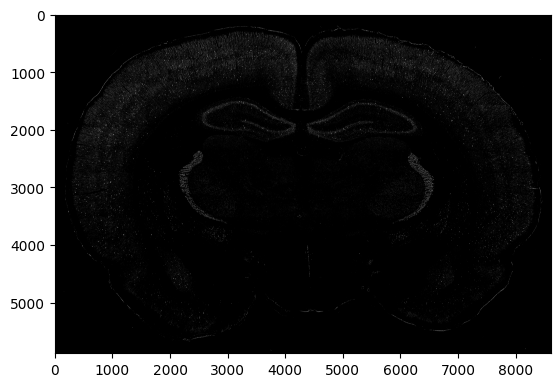

In [53]:
# display the image
plt.imshow(img1_quantized*100, cmap='gray')